In [9]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")
library(cowplot)
library(gg.gap)
library(ggpol)
options(warn=-1)

## Figure 8B

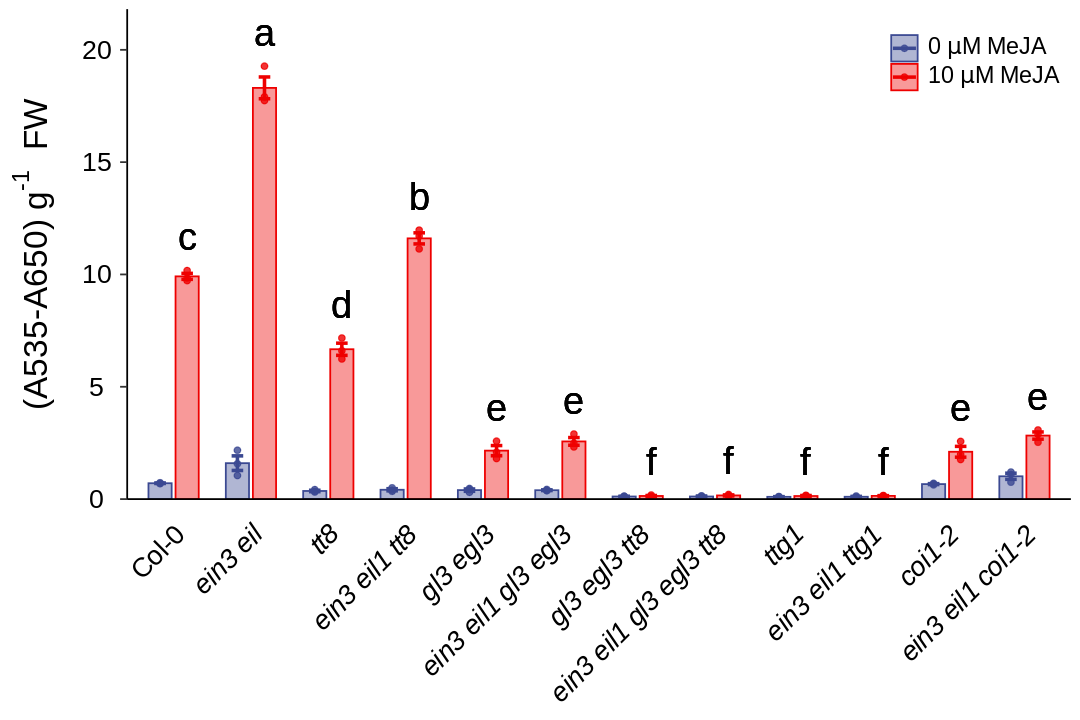

In [10]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/8B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:5)],1,max) + 1.5

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil",
                                                      "tt8",
                                                      "ein3 eil1 tt8",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl3 egl3 tt8",
                                                      "ein3 eil1 gl3 egl3 tt8",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1",
                                                      "coi1-2",
                                                      "ein3 eil1 coi1-2"))

# # df_long$treatment <- factor(df_long$treatment, level=c("0 uM MeJA",
# #                                                         "5 uM MeJA",
# #                                                         "20 uM MeJA"))

df_long$treatment <- factor(df_long$treatment, levels=c("0 uM MeJA",
                                                  "10 uM MeJA"),
                                                  labels=c('{}~0~mu*M~MeJA',
                                                           '{}~10~mu*M~MeJA'))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.9,0.9),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}


# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil")),
               expression(italic("tt8")),
               expression(italic("ein3 eil1 tt8")),                
               expression(italic("gl3 egl3")),                
               expression(italic("ein3 eil1 gl3 egl3")),                 
               expression(italic("gl3 egl3 tt8")),                
               expression(italic("ein3 eil1 gl3 egl3 tt8")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1 ttg1")),
               expression(italic("coi1-2")),
               expression(italic("ein3 eil1 coi1-2"))
               )

# set figure size
options(repr.plot.width = 9, repr.plot.height = 6)

p <- ggplot(df_long, aes(genotype,value, fill=treatment, color=treatment))

B8 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(0.7),
                 width = 0.6,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.3,
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.7)) +
    theme_custom() +
    scale_fill_aaas(labels=c(expression(paste("0 ",mu,"M MeJA")),expression(paste("10 ",mu,"M MeJA"))),
                    guide=guide_legend(ncol=1)) +
    scale_color_aaas(labels=expression(paste("0 ",mu,"M MeJA"),paste("10 ",mu,"M MeJA")),
                    guide=guide_legend(ncol=1)) + 
    scale_x_discrete(labels=xtick_labs) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("(A535-A650) g" ^ "-1" ~ " FW")) +
    geom_text(aes(label= sig, y= max),
              size=8,
              color="black",
              position = position_dodge(0.7), 
              check_overlap=FALSE, 
              show.legend=FALSE)
B8

## Figure 8C

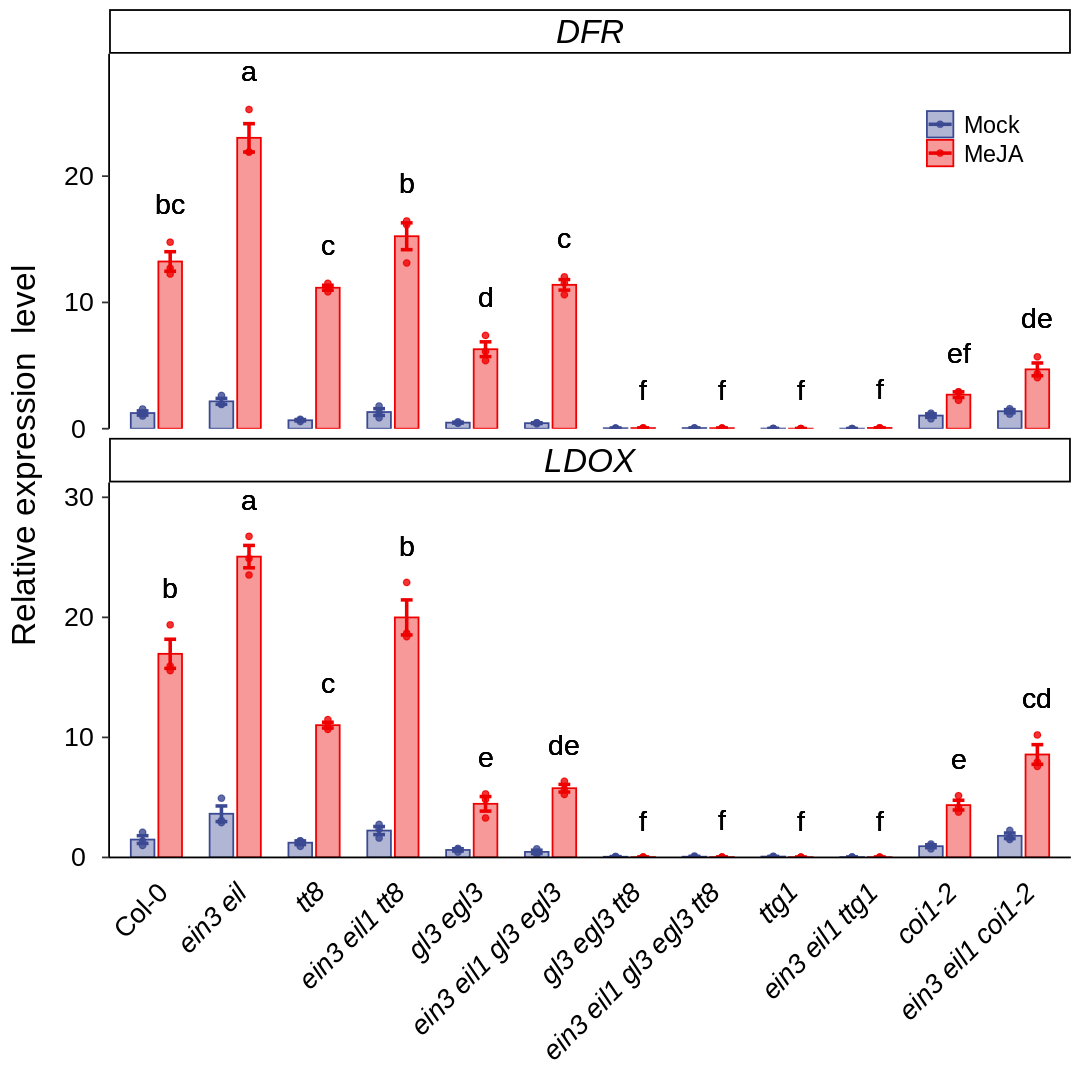

In [11]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/8C.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(4:6)],1,max) + 3

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil",
                                                      "tt8",
                                                      "ein3 eil1 tt8",
                                                      "gl3 egl3",
                                                      "ein3 eil1 gl3 egl3",
                                                      "gl3 egl3 tt8",
                                                      "ein3 eil1 gl3 egl3 tt8",
                                                      "ttg1",
                                                      "ein3 eil1 ttg1",
                                                      "coi1-2",
                                                      "ein3 eil1 coi1-2"))

df_long$treatment <- factor(df_long$treatment, levels=c("Mock",
                                                        "MeJA"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.9,0.9),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}


# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil")),
               expression(italic("tt8")),
               expression(italic("ein3 eil1 tt8")),                
               expression(italic("gl3 egl3")),                
               expression(italic("ein3 eil1 gl3 egl3")),                 
               expression(italic("gl3 egl3 tt8")),                
               expression(italic("ein3 eil1 gl3 egl3 tt8")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1 ttg1")),
               expression(italic("coi1-2")),
               expression(italic("ein3 eil1 coi1-2"))
               )

# set figure size
options(repr.plot.width = 9, repr.plot.height = 9)

p <- ggplot(df_long, aes(genotype,value, fill=treatment, color=treatment))

C8 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(0.7),
                 width = 0.6,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.3,
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.7)) +
    theme_custom() +
    facet_wrap(~ gene, 
               nrow=2, 
               scales="free_y") + 
    scale_fill_aaas(labels=c("Mock","MeJA"),
                    guide=guide_legend(ncol=1)) +
    scale_color_aaas(labels=c("Mock","MeJA"),
                    guide=guide_legend(ncol=1)) + 
    scale_x_discrete(labels=xtick_labs) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("Relative expression  level")) +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(0.7), 
              check_overlap=FALSE, 
              show.legend=FALSE)
C8

## Figure 8E

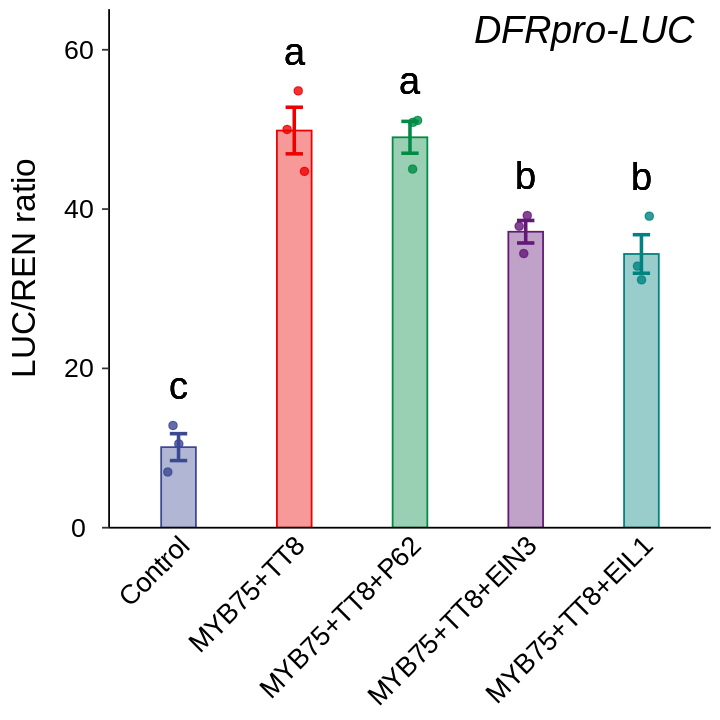

In [12]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/8E.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:4)],1,max) + 5


# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Control",
                                                      "MYB75+TT8",
                                                      "MYB75+TT8+P62",
                                                      "MYB75+TT8+EIN3",
                                                      "MYB75+TT8+EIL1"))



# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         hjust=1, vjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 6, repr.plot.height = 6)

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))

E8 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.3,
                 position = position_dodge(1),
                 alpha=0.4,
                 show.legend=FALSE
                 ) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.15, 
                 size=1,
                 show.legend=FALSE
                 ) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1,
                show.legend=FALSE
               ) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
#     facet_wrap(~ treatment, 
#                nrow=1, 
#                scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=8,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    annotate(geom="text", x=4.5, y=62,size=8,
            label=expression(italic("DFRpro-LUC")))
E8

## Figure 8F

In [13]:
df

genotype,R1,R2,R3,sig,max
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Control,7.006793,10.52954,12.81214,c,17.81214
MYB75+TT8,50.016822,44.71334,54.83966,a,59.83966
MYB75+TT8+P62,50.915736,45.01392,51.10190,a,56.10190
MYB75+TT8+EIN3,37.854351,34.43131,39.17959,b,44.17959
MYB75+TT8+EIL1,39.098735,32.85686,31.14213,b,44.09873


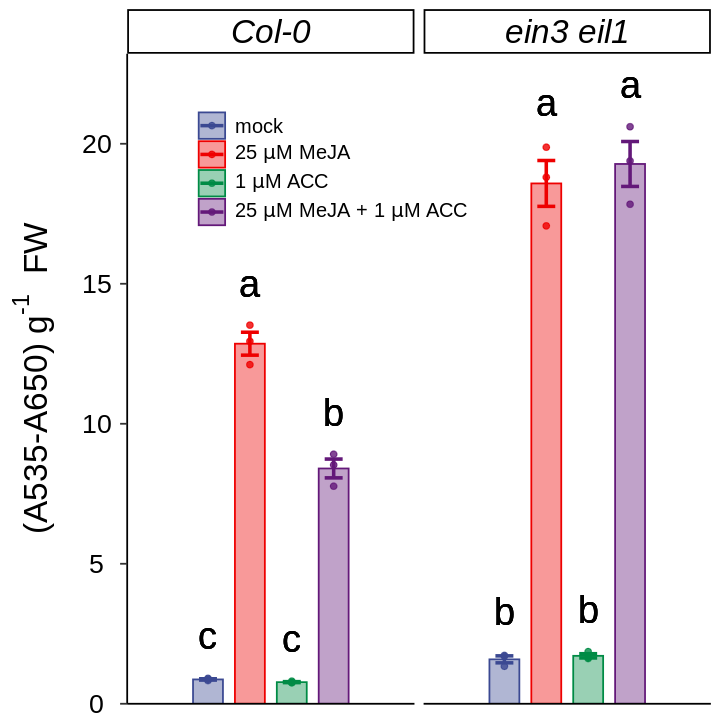

In [14]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/8F.tab",
               sep='\t',
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:8)],1,max) + 1.5

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1"))


df_long$treatment <- factor(df_long$treatment, levels=c("MS",
                                                        "MS+JA25",
                                                        "MS+ACC1",
                                                        "MS+JA25+ACC1"),
                                                  labels=c('{}~MS',
                                                           '{}~25~mu*M~MeJA',
                                                           '{}~1~mu*M~ACC',
                                                           '{}~25~mu*M~MeJA~+~1~mu*M~ACC'))




# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_blank(),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.35,0.83),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 12),
              legend.text.align = 0
             )
}


# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil")),
               expression(italic("tt8")),
               expression(italic("ein3 eil1 tt8")),                
               expression(italic("gl3 egl3")),                
               expression(italic("ein3 eil1 gl3 egl3")),                 
               expression(italic("gl3 egl3 tt8")),                
               expression(italic("ein3 eil1 gl3 egl3 tt8")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1 ttg1")),
               expression(italic("coi1-2")),
               expression(italic("ein3 eil1 coi1-2"))
               )

# set figure size
options(repr.plot.width = 6, repr.plot.height = 6)

p <- ggplot(df_long, aes(genotype,value, fill=treatment, color=treatment))

F8 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(0.7),
                 width = 0.5,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.3,
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.7)) +
    theme_custom() +
    facet_wrap(~ genotype, 
               nrow=1, 
               scales="free_x",
               ) +
    scale_fill_aaas(labels=c("mock",
                            expression(paste("25 ",mu,"M MeJA")),
                            expression(paste("1 ",mu,"M ACC")),
                            expression(paste("25 ",mu,"M MeJA"," + ","1 ",mu,"M ACC"))),
                    guide=guide_legend(ncol=1)) +
    scale_color_aaas(labels=c("mock",
                            expression(paste("25 ",mu,"M MeJA")),
                            expression(paste("1 ",mu,"M ACC")),
                            expression(paste("25 ",mu,"M MeJA"," + ","1 ",mu,"M ACC"))),
                    guide=guide_legend(ncol=1)) + 
    scale_x_discrete(labels=xtick_labs) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("(A535-A650) g" ^ "-1" ~ " FW")) +
    geom_text(aes(label= sig, y= max),
              size=8,
              color="black",
              position = position_dodge(0.7), 
              check_overlap=FALSE, 
              show.legend=FALSE)
F8

## Combination

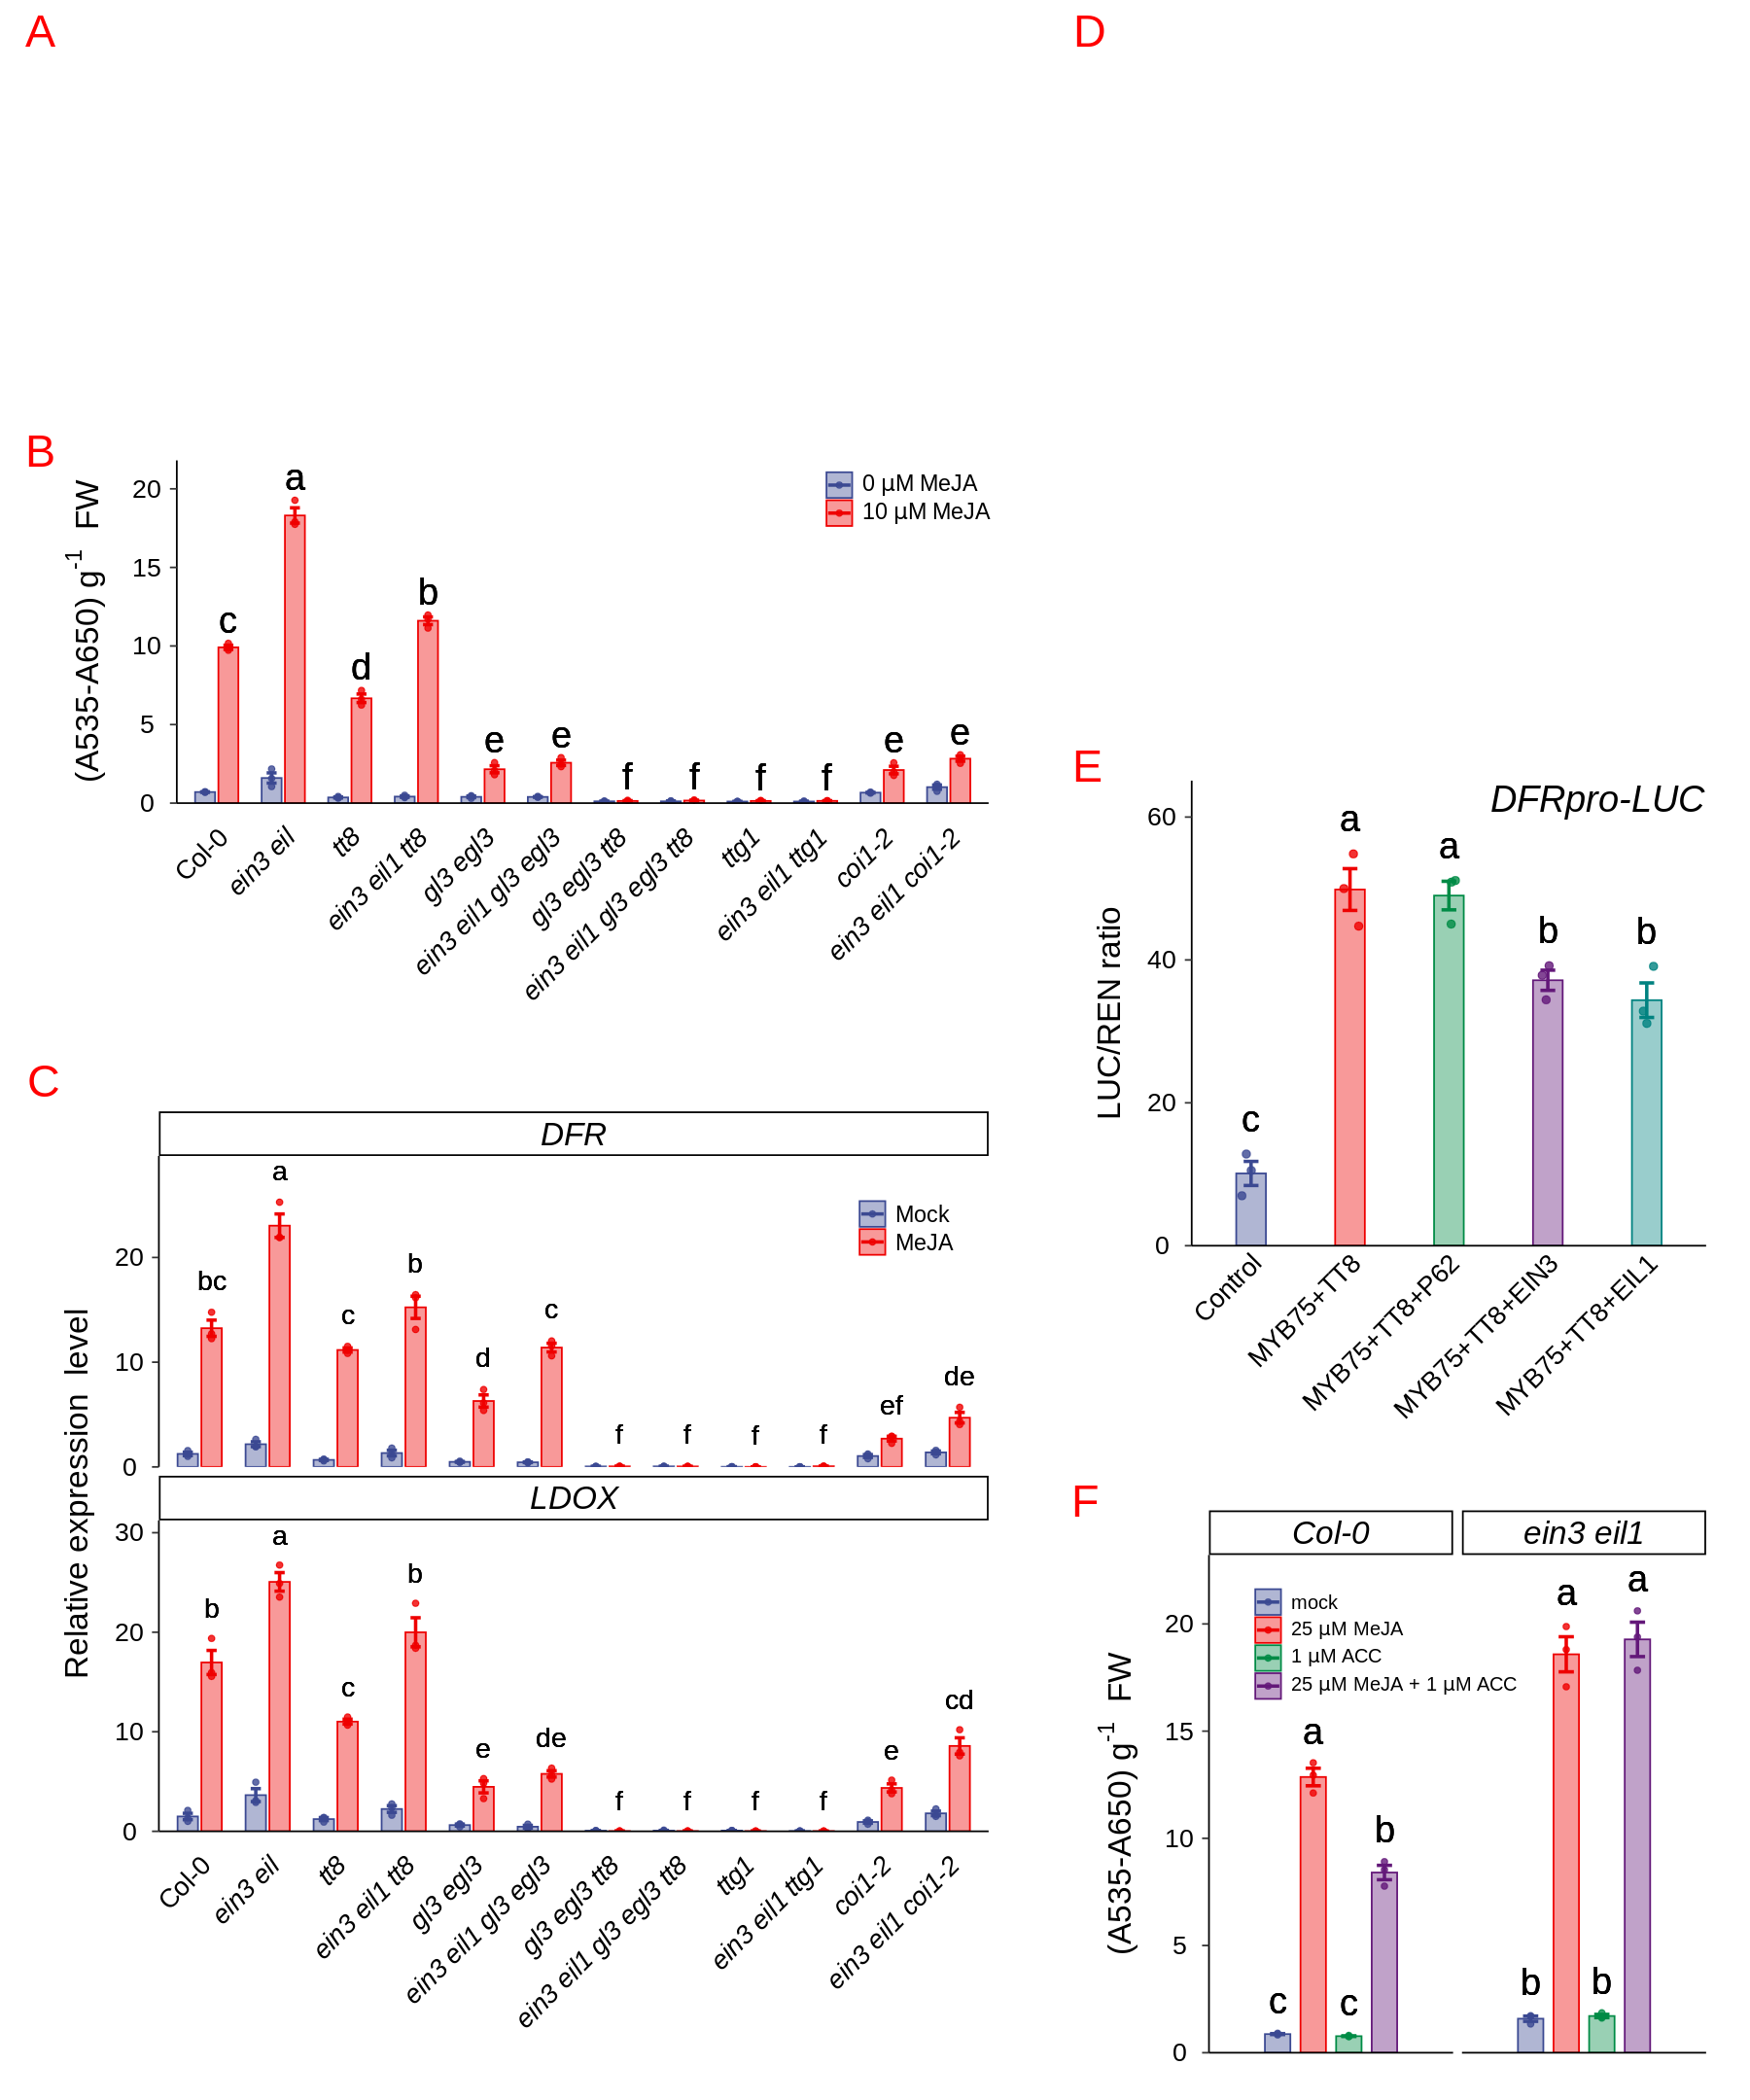

In [15]:
options(repr.plot.width = 9, repr.plot.height = 18)
fig8_p1 <- plot_grid(NULL,B8,C8,
          ncol=1,
          rel_heights=c(4,6,10),
          labels = c('A','B','C'),
          label_colour = 'red',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                    scale=0.9)

options(repr.plot.width = 6, repr.plot.height = 18)
fig8_p2 <- plot_grid(NULL,E8,F8,
          ncol=1,
          rel_heights=c(7,7,6),
          labels = c('D','E','F'),
          label_colour = 'red',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                    scale=0.9)

options(repr.plot.width = 15, repr.plot.height = 18)
fig8 <- plot_grid(fig8_p1, fig8_p2,
                 rel_widths=c(9,6))

fig8
ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/8_fig_done/Figure8.png",
      fig8, height=18, width=16, dpi=300)